# 股票数据统计信息

在此 Lab 中，我们将在 Pandas DataFrame 中加载股票数据，并计算一些统计指标。我们将处理 Google、Apple 和 Amazon 的股票数据。所有数据都来自雅虎金融，格式为 CSV。在你的 workspace 中应该有一个包含 Google 股票数据的 GOOG.csv  文件，一个包含 Apple 股票数据的 AAPL.csv 文件和一个包含 Amazon 股票数据的 AMZN.csv 文件。所有文件都包含 7 列数据：

**Date Open High Low Close Adj_Close Volume**

首先，我们会将上述 CSV 文件读取到 DataFrame 中，看一下数据看起来如何。

In [1]:
# We import pandas into Python
import pandas as pd

# We read in a stock data data file into a data frame and see what it looks like
df = pd.read_csv('./GOOG.csv')

# We display the first 5 rows of the DataFrame
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.676899,51.693783,47.669952,49.845802,49.845802,44994500
1,2004-08-20,50.178635,54.187561,49.925285,53.805050,53.805050,23005800
2,2004-08-23,55.017166,56.373344,54.172661,54.346527,54.346527,18393200
3,2004-08-24,55.260582,55.439419,51.450363,52.096165,52.096165,15361800
4,2004-08-25,52.140873,53.651051,51.604362,52.657513,52.657513,9257400


<div>
<style>
    .dataframe thead tr:only-child th {
        text-align: right;
    }

可以清晰地看出，Dataframe 自动使用整数标记行索引，并使用 CSV 文件中的列名称标记列。

# TODO

现在，你需要将 Google、Apple 和 Amazon 的股票数据加载到单独的 DataFrame 中。但是，对于每个股票数据，你只需将 `Date` 和 `Adj Close` 列加载到 Dataframe 中。此外，你需要将 `Date` 列用做行索引。最后，你需要让  DataFrame 将日期识别为真实日期（年-月-日），而不是字符串。对于每支股票，你可以通过在 `pd.read_csv()` 函数中使用相应的关键字，只需一行代码就能完成所有这些操作。下面是一些提示：

* 使用 `index_col` 关键字表示要将哪列作为索引。例如 `index_col = ['Open']`

* 将 `parse_dates` 关键字设为 `['Date']`，将字符串类型的日期转换为日期类型的日期

* 使用 `usecols` 关键字选择要将哪些列加载到 DataFrame 中。例如 `usecols = ['Open', 'High']`

填充以下代码：

In [2]:
# We load the Google stock data into a DataFrame
google_stock = pd.read_csv('./GOOG.csv', index_col = ['Date'], parse_dates = ['Date'], usecols = ['Date', 'Adj Close'])

# We load the Apple stock data into a DataFrame
apple_stock = pd.read_csv('./AAPL.csv', index_col = ['Date'], parse_dates = ['Date'], usecols = ['Date', 'Adj Close'])

# We load the Amazon stock data into a DataFrame
amazon_stock = pd.read_csv('./AMZN.csv', index_col = ['Date'], parse_dates = ['Date'], usecols = ['Date', 'Adj Close'])


你可以通过显示 DataFrame 的标头，检查是否正确地加载了数据。

In [3]:
# We display the google_stock DataFrame
google_stock.head()

,Adj Close
Date,
2004-08-19,49.845802
2004-08-20,53.805050
2004-08-23,54.346527
2004-08-24,52.096165
2004-08-25,52.657513


现在，你需要将上述三个 DataFrame 连接到一起，创建一个新的 DataFrame，其中包含所有股票的所有 `Adj Close`。我们先创建一个空的 DataFrame，其中具有在 `2000-01-01`  和 `2016-12-31` 之间的行索引日历日期。我们首先将使用 `pd.date_range()` 函数创建日历日期，然后创建一个将这些日期当做行索引的 DataFrame：

In [4]:
# We create calendar dates between '2000-01-01' and  '2016-12-31'
dates = pd.date_range('2000-01-01', '2016-12-31')

# We create and empty DataFrame that uses the above dates as indices
all_stocks = pd.DataFrame(index = dates)

# TODO

现在需要将单个 DataFrame `google_stock`、`apple_stock` 和 `amazon_stock` 连接成 `all_stocks` DataFrame。但是，在执行此操作之前，有必要更改三个 DataFrame 中的列名称。因为 `all_stocks` DataFrame 中的列标签必须是唯一的。因为三个 DataFrame 中的所有列都具有相同的名称 `Adj Close`，我们必须将它们更改为股票名称，然后再连接它们。在下面的空白处，将每个 DataFrame 的列标签 `Adj Close` 更改为相应股票的名称。为此，你可以使用 `pd.DataFrame.rename()` 函数。

In [5]:
# Change the Adj Close column label to Google
google_stock = google_stock.rename(index=str, columns={'Adj Close':'Google'})

# Change the Adj Close column label to Apple
apple_stock = apple_stock.rename(index=str, columns={'Adj Close':'Apple'})

# Change the Adj Close column label to Amazon
amazon_stock = amazon_stock.rename(index=str, columns={'Adj Close':'Amazon'})


你可以通过显示 DataFrame，检查是否正确地更改了列标签

In [6]:
# We display the google_stock DataFrame
google_stock.head()

,Google
Date,
2004-08-19 00:00:00,49.845802
2004-08-20 00:00:00,53.805050
2004-08-23 00:00:00,54.346527
2004-08-24 00:00:00,52.096165
2004-08-25 00:00:00,52.657513


现在列标签已经是唯一的，我们可以将单个 DataFrame 连接成 `all_stocks` DataFrame。为此，我们将使用 `dataframe.join()` 函数。函数 `dataframe1.join(dataframe2)` 将 `dataframe1` 与 `dataframe2`相连接。我们将逐个将每个 DataFrame 连接到 `all_stocks` DataFrame。请填写以下代码，以连接这些 DataFrame，我们已帮你完成第一次连接：

In [7]:
# We join the Google stock to all_stocks
all_stocks = all_stocks.join(google_stock)

# We join the Apple stock to all_stocks
all_stocks = all_stocks.join(apple_stock)

# We join the Amazon stock to all_stocks
all_stocks =all_stocks.join(amazon_stock)

你可以通过显示 `all_stocks`  DataFrame 检查是否正确地连接了这些 DataFrame。

In [8]:
# We display the google_stock DataFrame
all_stocks.head()

,Google,Apple,Amazon
2000-01-01,NaN,NaN,NaN
2000-01-02,NaN,NaN,NaN
2000-01-03,NaN,3.596616,89.3750
2000-01-04,NaN,3.293384,81.9375
2000-01-05,NaN,3.341579,69.7500


# 代办事项

在获取股票数据的统计信息之前，我们先检查下是否有任何 *NaN* 值。在下面的空白处，检查 `all_stocks` DataFrame 中是否有任何 *NaN* 值。如果有，请删除包含  *NaN* 值的所有行：

In [15]:
# Check if there are any NaN values in the all_stocks dataframe
all_stocks.isnull().values.any()

# Remove any rows that contain NaN values
all_stocks.dropna(axis=0,inplace=True)

你已经删除了任何  *NaN* 值，我们可以计算股价的一些基本统计指标了。请填充以下代码

In [21]:
# Print the average stock price for each stock
print(all_stocks.mean(axis=0),end='\n\n')
# Print the median stock price for each stock
print(all_stocks.median(axis=0),end='\n\n')
# Print the standard deviation of the stock price for each stock  
print(all_stocks.std(axis=0),end='\n\n')
# Print the correlation between stocks
print(all_stocks.corr(),end='\n\n')

Google    347.420229
Apple      47.736018
Amazon    216.598177
dtype: float64

Google    286.397247
Apple      39.461483
Amazon    161.820007
dtype: float64

Google    187.671596
Apple      37.421555
Amazon    199.129792
dtype: float64

          Google     Apple    Amazon
Google  1.000000  0.900242  0.952444
Apple   0.900242  1.000000  0.886321
Amazon  0.952444  0.886321  1.000000



我们现在将了解如何计算滚动统计指标，也称之为移动统计指标。例如，我们可以通过使用 Pandas `dataframe.rolling().mean()` 方法，计算 Google 股价的滚动均值（移动平均值）。`dataframe.rolling(N).mean()` 会计算  `N` 天期限的滚动均值。换句话说，我们可以通过使用上述方法查看每隔 `N`  天的平均股价。请填写以下代码，计算 Google 股票每隔 150 天的平均股价。

In [24]:
# We compute the rolling mean using a 150-Day window for Google stock
rollingMean = all_stocks['Google'].rolling(150).mean()

我们还可以通过绘制 DataFrame 中的数据可视化滚动均值。在下面的课程中，你将学习如何使用 **Matplotlib** 可视化数据。暂时我们将导入 matplotlib 并在滚动均值上方绘制 Google 股票数据。你可以更改滚动均值期限，看看图形有何变化。

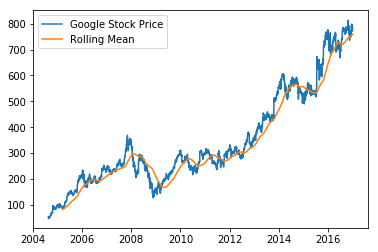

In [26]:
# We import matplotlib into Python
import matplotlib.pyplot as plt
%matplotlib inline
# We plot the Google stock data
plt.plot(all_stocks['Google'])

# We plot the rolling mean ontop of our Google stock data
plt.plot(rollingMean)
plt.legend(['Google Stock Price', 'Rolling Mean'])
plt.show()